In [ ]:
import pandas as pd
df=pd.read_excel('/content/compiled_risk_data.xlsx')
df.head()



,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                1093 non-null   object
 1   Smart contract address                      1093 non-null   object
 2   Blog post link                              1093 non-null   object
 3   Audit website                               1093 non-null   object
 4   Chain                                       1093 non-null   object
 5   Is_closed_source                            1093 non-null   bool  
 6   hidden_owner                                1093 non-null   bool  
 7   anti_whale_modifiable                       1093 non-null   bool  
 8   Is_anti_whale                               1093 non-null   bool  
 9   Is_honeypot                                 1093 non-null   bool  
 10  buy_tax                 

In [ ]:
risk_columns=['Is_closed_source','hidden_owner','anti_whale_modifiable',
              'Is_anti_whale','Is_honeypot','buy_tax','sell_tax',
              'slippage_modifiable', 'Is_blacklisted','can_take_back_ownership',
              'owner_change_balance','is_airdrop_scam', 'selfdestruct',
              'trust_list','is_whitelisted','is_fake_token','illegal_unicode' ,
              'exploitation' ,'bad_contract' ,'reusing_state_variable',
              'encode_packed_collision', 'encode_packed_parameters',
              'centralized_risk_medium', 'centralized_risk_high',
              'centralized_risk_low', 'event_setter','external_dependencies',
              'immutable_states','reentrancy_without_eth_transfer',
              'incorrect_inheritance_order', 'shadowing_local', 'events_maths']

frequencies=df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)
frequencies


Is_closed_source                   146
hidden_owner                       164
anti_whale_modifiable              122
Is_anti_whale                      155
Is_honeypot                         94
buy_tax                            128
sell_tax                           126
slippage_modifiable                149
Is_blacklisted                      81
can_take_back_ownership            194
owner_change_balance               222
is_airdrop_scam                     69
selfdestruct                       116
trust_list                         149
is_whitelisted                     109
is_fake_token                       90
illegal_unicode                     62
exploitation                       468
bad_contract                       373
reusing_state_variable             124
encode_packed_collision             81
encode_packed_parameters            87
centralized_risk_medium            283
centralized_risk_high              205
centralized_risk_low               190
event_setter             

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<ipython-input-35-0b987bf9be86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index,y=frequencies.values,palette='viridis')


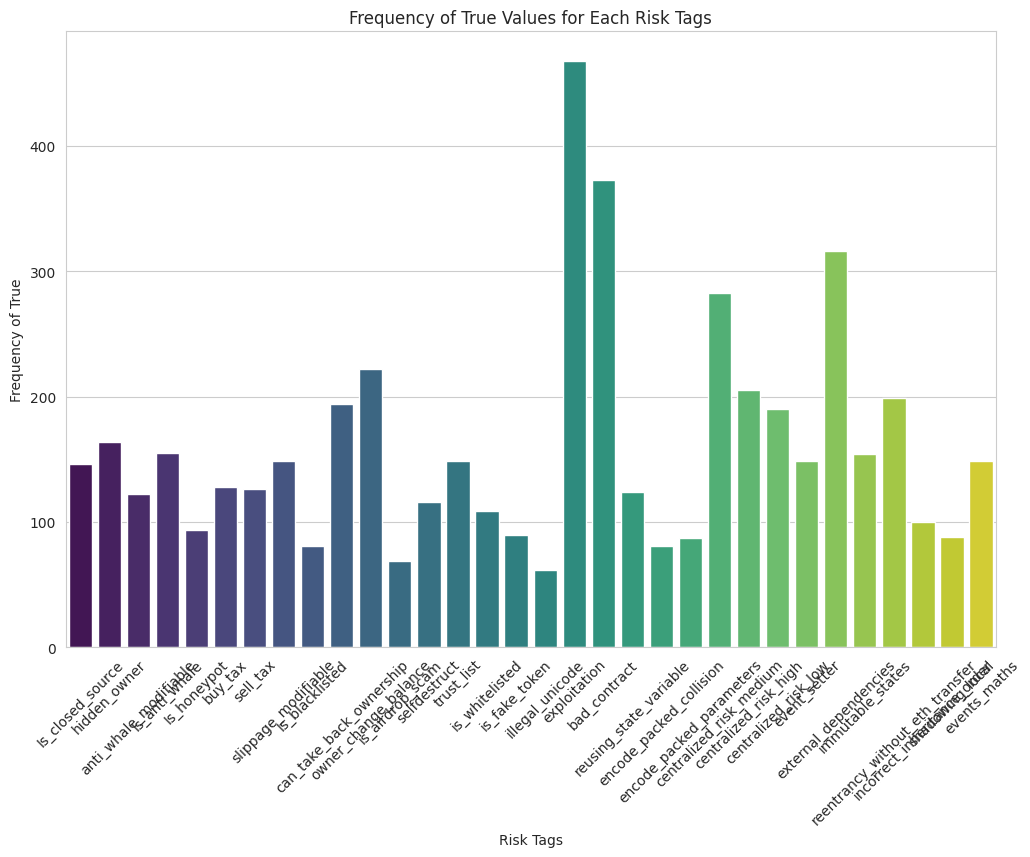

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x=frequencies.index,y=frequencies.values,palette='viridis')
plt.title('Frequency of True Values for Each Risk Tags')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
import scipy.stats

%matplotlib inline
print('Library Imported successfully')

Library Imported successfully


In [ ]:
def phi_coefficient(x,y):
  contingency_table=pd.crosstab(x,y)
  chi2=scipy.stats.chi2_contingency(contingency_table,correction=False)[0]
  n=np.sum(np.sum(contingency_table))
  phi=np.sqrt(chi2/n)
  return phi

phi=phi_coefficient(df['Is_honeypot'],df['anti_whale_modifiable'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable':{phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable':0.43014356785902874


In [ ]:
risk_df=df[risk_columns]

phi_matrix= pd.DataFrame(index=risk_df.columns,columns=risk_df.columns)

for var1 in risk_df.columns:
  for var2 in risk_df.columns:
    phi_matrix.loc[var1,var2] = phi_coefficient(risk_df[var1],risk_df[var2])

print("phi coefficients calculated for all pairs of variables")
phi_matrix

phi coefficients calculated for all pairs of variables


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.377241,0.330545,0.295222,0.378356,0.325367,0.380376,0.392646,0.350922,0.268073,...,0.154701,0.210932,0.188913,0.353457,0.141124,0.258405,0.267738,0.341803,0.368141,0.282918
hidden_owner,0.377241,1.0,0.396169,0.35796,0.318871,0.476409,0.441975,0.400521,0.30169,0.361349,...,0.207843,0.32317,0.179091,0.295992,0.138936,0.234851,0.259852,0.328749,0.299391,0.206395
anti_whale_modifiable,0.330545,0.396169,1.0,0.522184,0.430144,0.467261,0.508889,0.604309,0.343386,0.337212,...,0.234878,0.343256,0.151742,0.367221,0.216158,0.290703,0.30709,0.391393,0.396996,0.324884
Is_anti_whale,0.295222,0.35796,0.522184,1.0,0.361724,0.504441,0.485596,0.480527,0.345546,0.271046,...,0.214742,0.274977,0.214919,0.327664,0.163063,0.363041,0.270344,0.344022,0.380936,0.304734
Is_honeypot,0.378356,0.318871,0.430144,0.361724,1.0,0.385562,0.42062,0.382178,0.473817,0.275998,...,0.19862,0.220442,0.229566,0.353648,0.200276,0.401028,0.328827,0.457276,0.436948,0.382178
buy_tax,0.325367,0.476409,0.467261,0.504441,0.385562,1.0,0.706026,0.468933,0.342314,0.344645,...,0.271892,0.306085,0.178313,0.303088,0.188246,0.359557,0.277935,0.377879,0.425561,0.327965
sell_tax,0.380376,0.441975,0.508889,0.485596,0.42062,0.706026,1.0,0.466078,0.379094,0.274693,...,0.309845,0.325616,0.204843,0.332492,0.199511,0.339642,0.334513,0.35248,0.430177,0.307444
slippage_modifiable,0.392646,0.400521,0.604309,0.480527,0.382178,0.468933,0.466078,1.0,0.315123,0.352786,...,0.233869,0.307745,0.204737,0.378341,0.217158,0.321931,0.351499,0.354841,0.431227,0.316176
Is_blacklisted,0.350922,0.30169,0.343386,0.345546,0.473817,0.342314,0.379094,0.315123,1.0,0.25251,...,0.151716,0.32934,0.165155,0.355839,0.204795,0.317108,0.273813,0.394809,0.455437,0.325302
can_take_back_ownership,0.268073,0.361349,0.337212,0.271046,0.275998,0.344645,0.274693,0.352786,0.25251,1.0,...,0.250195,0.353414,0.166029,0.269045,0.163273,0.314297,0.233799,0.367523,0.311373,0.234152


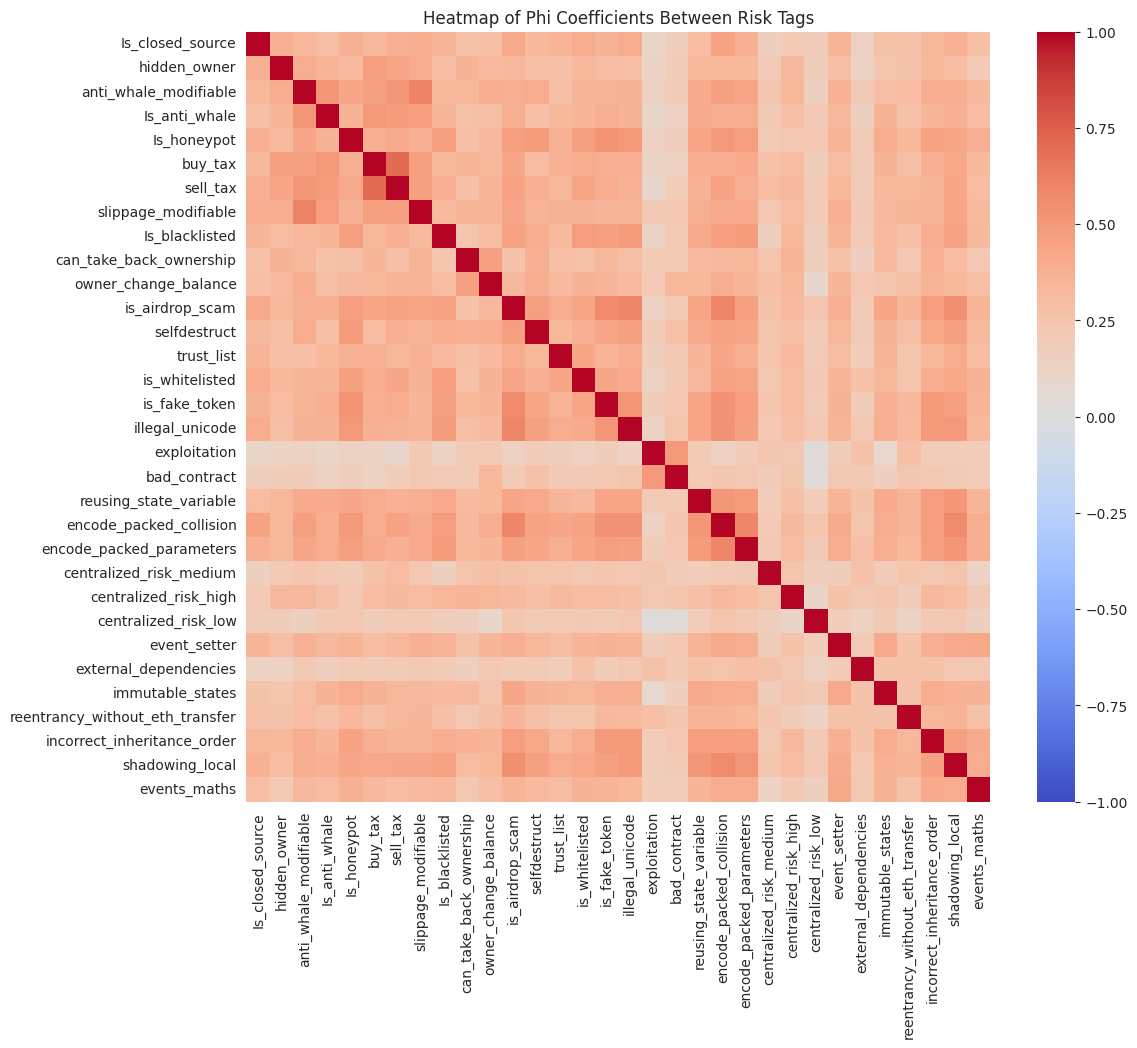

In [ ]:
plt.figure(figsize=(12,10))

sns.heatmap(phi_matrix.astype(float),annot=False,fmt=".2f",cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()